In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading Data

In [2]:
df = pd.read_csv('./mnist.csv')

In [3]:
df.values.shape

(42000, 785)

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# fetching data from the dataset
data = df.values
X = data[:,1:]
Y = data[:,0]
print(X.shape, Y.shape)

(42000, 784) (42000,)


In [6]:
#train-test split
t = int(np.floor(X.shape[0]*0.85))
X_train = X[:t,:]
X_test = X[t:,:]
Y_train = Y[:t]
Y_test = Y[t:]
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(35700, 784) (35700,)
(6300, 784) (6300,)


## Applying KNN

In [7]:
def dist(x,query_x):
    return np.sqrt(((query_x-x)**2).sum())

def knn(X,Y,query_x,k=5):
    vals = []
    m =  X.shape[0]
    
    for i in range(m):
        d = dist(X[i], query_x)
        vals.append([d, Y[i]])
        
    vals = sorted(vals)
    vals = vals[:k]
    
    vals = np.array(vals)
    
    new_vals = np.unique(vals[:,1], return_counts=True)
    
    index = new_vals[1].argmax()
    
    pred = new_vals[0][index]
    
    return pred

def drawImg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()
    
def predict(X,Y,query_x,k=5):
    drawImg(query_x)
    pred = knn(X,Y,query_x,k)
    print(f"Predicted Value : {int(pred)}")
    

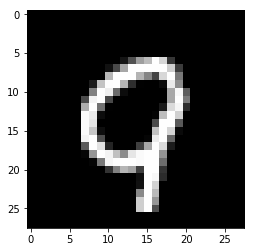

Predicted Value : 9
Actual Value : 9
CPU times: user 1.1 s, sys: 1.51 ms, total: 1.1 s
Wall time: 1.1 s


In [17]:
%%time
query_index = 161
predict(X_train,Y_train,X_test[query_index],k=20)
print(f"Actual Value : {Y_test[query_index]}")


In [18]:
def acc(X_train,Y_train,X_test,Y_test,k=5):
    m = X_test.shape[0]
    correct = 0
    itr = 0
    for i in range(m):
        itr += 1
        pred = knn(X_train,Y_train,X_test[i],k)
        actual = Y_test[i]
        if pred == actual:
            correct += 1
        print(f"Number of samples iterated : {itr}\tAccuracy : {(correct/itr)*100}%",end='\r')
        

In [19]:
acc(X_train,Y_train,X_test,Y_test,k=20)